In [1]:
import matplotlib.pyplot as plt
import pandas as pd
import numpy as np
import uproot3
import sklearn
from sklearn.utils import shuffle
from matplotlib.lines import Line2D
import math
import seaborn as sns

from tensorflow import keras
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense
from keras.utils import to_categorical
from keras.optimizers import Adam
from tensorflow.keras.optimizers import SGD
import shap

from sklearn.model_selection import cross_val_score
from sklearn.model_selection import KFold
from sklearn.preprocessing import LabelEncoder
from sklearn.pipeline import Pipeline
from itertools import chain
import tensorflow as tf
from keras import optimizers, initializers

import itertools
from sklearn import datasets
from sklearn.model_selection import train_test_split, KFold, GridSearchCV
from sklearn.metrics import confusion_matrix, classification_report, accuracy_score
from keras.models import Sequential
from keras.layers import Dense
from keras.utils import to_categorical

from sklearn import datasets
from sklearn.tree import DecisionTreeClassifier
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import roc_curve, roc_auc_score, auc
from sklearn.model_selection import train_test_split

2024-09-09 08:50:14.034084: I tensorflow/core/util/util.cc:169] oneDNN custom operations are on. You may see slightly different numerical results due to floating-point round-off errors from different computation orders. To turn them off, set the environment variable `TF_ENABLE_ONEDNN_OPTS=0`.
2024-09-09 08:50:14.036960: W tensorflow/stream_executor/platform/default/dso_loader.cc:64] Could not load dynamic library 'libcudart.so.11.0'; dlerror: libcudart.so.11.0: cannot open shared object file: No such file or directory; LD_LIBRARY_PATH: /home/anza-tshilidzi/root/root-6.26.06-install/lib::/home/anza-tshilidzi/Downloads/LHAPDF/lib:/home/anza-tshilidzi/Downloads/LHAPDF/lib
2024-09-09 08:50:14.036970: I tensorflow/stream_executor/cuda/cudart_stub.cc:29] Ignore above cudart dlerror if you do not have a GPU set up on your machine.


In [2]:
SigTree1 = uproot3.open('Signal_events500k1.root')
SigTree2 = uproot3.open('Signal_events500k2.root')
BackTree1 = uproot3.open('Back_events300k1.root')
BackTree2 = uproot3.open('Back_events300k2.root')
BackTree3 = uproot3.open('Back_events400k.root')

#SigTree = uproot3.open('sig.root')
#BackTree = uproot3.open('back.root')

In [3]:
SigArr1 = SigTree1['tree'].arrays()
SigArr2 = SigTree2['tree'].arrays()
#SigArr = SigTree['tree'].arrays()

SigDf1 = pd.DataFrame(SigArr1)
SigDf2 = pd.DataFrame(SigArr2)
#SigDf = pd.DataFrame(SigArr)

# Combine the two DataFrames along rows (axis=0)
SigDf = pd.concat([SigDf1, SigDf2], axis=0)

# Reset the index if needed (optional)
SigDf.reset_index(drop=True, inplace=True)

SigDf.head(10)

#BackArr = BackTree['tree'].arrays()
#BackDf = pd.DataFrame(BackArr)
#BackDf.head(10)

,b'EnrMuP',b'EnrMuM',b'ThetaMuP',b'ThetaMuM',b'PhiMuP',b'PhiMuM',b'EnrBjet1',b'EnrBjet2',b'ThetaBjet1',b'ThetaBjet2',b'PhiBjet1',b'PhiBjet2',b'InMmuPM',b'InMbb',b'Mrecoil',b'weight'
0,55.335168,66.170540,2.390468,2.255659,-1.257939,1.379276,90.131164,26.608907,0.516294,1.655843,-3.037761,-0.373494,85.592011,85.089567,95.253021,0.010165
1,39.202890,83.823100,1.197895,2.265082,-1.647204,3.035906,56.273742,51.464950,1.591423,0.916735,1.155387,-0.624744,90.785080,83.950203,96.067351,0.010165
2,91.853874,25.545246,1.867516,0.590604,-1.089002,-2.971140,79.355760,30.838514,1.374459,2.043361,1.437631,-3.086194,81.228734,78.747568,101.973269,0.010165
3,90.867978,32.343567,1.696695,1.194225,-2.842603,1.486644,66.735948,50.421943,1.079640,2.111337,0.600486,-0.793428,90.424914,87.081989,95.241236,0.010165
4,57.565914,63.817790,0.517632,1.200565,-2.192912,0.527492,81.651797,34.606221,2.272922,1.983148,3.037968,-0.315272,90.168434,90.269110,99.691998,0.010165
5,30.983534,92.439568,1.937703,0.470352,0.189544,-1.815997,76.961564,33.444879,2.606995,1.393013,2.988193,0.941985,92.631326,84.577711,96.793655,0.010165
6,97.869131,26.051180,0.653607,1.671538,1.962117,-1.432238,58.222691,53.369074,1.964703,2.496798,-0.469301,3.128536,92.158594,86.474983,95.042361,0.010165
7,87.596385,35.452746,2.790503,0.995695,-0.504202,0.453746,87.137753,27.416065,0.877479,1.431092,2.699749,-1.063129,91.390704,86.516856,96.579995,0.010165
8,64.994092,57.743989,1.548394,0.424273,-0.107926,-2.025275,55.167360,72.343295,1.667630,2.324584,1.667304,-2.721265,91.662716,96.768468,97.637149,0.010165
9,70.517112,54.506569,2.238415,0.813530,-1.874080,-3.027903,80.198609,30.296679,1.180389,2.281713,1.100131,-0.501425,95.811921,80.185649,95.750112,0.010165


In [4]:
BackArr1 = BackTree1['tree'].arrays()
BackArr2 = BackTree2['tree'].arrays()
BackArr3 = BackTree3['tree'].arrays()
#BackArr = BackTree['tree'].arrays()

BackDf1 = pd.DataFrame(BackArr1)
BackDf2 = pd.DataFrame(BackArr2)
BackDf3 = pd.DataFrame(BackArr3)
#BackDf = pd.DataFrame(BackArr)

# Combine the two DataFrames along rows (axis=0)
BackDf = pd.concat([BackDf1, BackDf2, BackDf3], axis=0)

# Reset the index if needed (optional)
BackDf.reset_index(drop=True, inplace=True)

BackDf.head(10)

,b'EnrMuP',b'EnrMuM',b'ThetaMuP',b'ThetaMuM',b'PhiMuP',b'PhiMuM',b'EnrBjet1',b'EnrBjet2',b'ThetaBjet1',b'ThetaBjet2',b'PhiBjet1',b'PhiBjet2',b'InMmuPM',b'InMbb',b'Mrecoil',b'weight'
0,102.282689,19.644855,0.410880,1.964995,1.302694,-1.924757,90.514165,26.909387,2.504559,2.043443,-2.116252,0.884097,83.127532,76.159782,91.904379,0.020541
1,51.631872,70.609372,1.683056,0.223100,1.706908,-0.083172,89.837866,28.017752,2.687177,0.872454,-1.338831,-2.841567,91.851372,88.646965,99.075996,0.020541
2,65.617711,59.174904,2.263416,2.235892,-1.362605,1.104504,78.877243,24.913950,0.299324,1.943594,-2.549187,1.862599,91.533477,75.105085,92.098152,0.020541
3,55.363214,67.694456,1.646938,0.943884,1.670957,0.006017,42.334872,37.955375,1.230632,2.084756,-1.822894,-2.278329,91.646258,39.978035,96.799801,0.020541
4,81.765589,44.628754,2.490003,1.964759,0.243177,2.998727,36.802393,65.580431,1.224773,0.440894,-2.509865,0.507232,94.111121,73.353696,90.331231,0.020541
5,90.226594,33.603577,0.561932,1.391862,1.299009,-1.765412,60.095232,53.855182,2.053010,2.569654,-1.806512,1.445551,91.216757,84.248303,94.368487,0.020541
6,64.578045,59.890792,0.184557,1.478681,3.089881,-0.271832,34.410258,60.478561,1.614100,2.780192,-3.044450,1.070039,91.734373,69.702041,93.170687,0.020541
7,78.294233,41.789732,0.812429,1.341165,-0.350951,1.921459,67.159984,28.919509,2.499529,1.974897,-3.066869,-2.888193,92.223438,26.270293,104.705205,0.020541
8,38.741521,85.689082,0.809138,2.014494,0.479135,-0.952715,68.047216,30.846374,1.309956,1.980264,2.167019,-2.318041,89.472862,74.217867,91.049940,0.020541
9,55.958976,63.022035,0.975707,2.047717,2.731735,-2.235350,59.786732,23.212906,2.003709,1.193018,-0.164812,1.113146,86.953751,51.041848,102.812690,0.020541


In [5]:
NSig = np.array(SigArr1[b'Mrecoil'])
NBack = np.array(BackArr1[b'Mrecoil'])

#file_name = 'testSig.txt'
#np.savetxt(file_name, NSig, fmt='%f')

L = 5*10**5
N = 10**6
SigWeight = 0.01*0.1
BackWeight = 0.0168
DelSys = 0.02

countSig = np.sum((NSig >= 93.5) & (NSig <= 97.5))
countBack = np.sum((NBack >= 93.5) & (NBack <= 97.5))
S = countSig*SigWeight*L/N
B = countBack*BackWeight*L/N
B_Sys = DelSys*B
signific = S/math.sqrt(B+B_Sys**2)

print(countSig)
print(countBack)
print('Significance is = ', signific)

133789
8286
Significance is =  7.908886520594547


In [6]:
SigDf.isnull().sum()
#BackDf.isnull().sum()

b'EnrMuP'        0
b'EnrMuM'        0
b'ThetaMuP'      0
b'ThetaMuM'      0
b'PhiMuP'        0
b'PhiMuM'        0
b'EnrBjet1'      0
b'EnrBjet2'      0
b'ThetaBjet1'    0
b'ThetaBjet2'    0
b'PhiBjet1'      0
b'PhiBjet2'      0
b'InMmuPM'       0
b'InMbb'         0
b'Mrecoil'       0
b'weight'        0
dtype: int64

In [7]:
#SigDf = SigDf.sample(n=40000, random_state=42) #SigDf.sample(n=len(BackDf), random_state=42)
#BackDf = BackDf.sample(n=50458, random_state=42)
print(SigDf[b'Mrecoil'].min())

69.59109038260502


In [8]:
#Drop highly correlated features
#SigDf = SigDf.drop(columns=[b'EnrBjet1',b'EnrBjet2',b'InMbb',b'ThetaBjet1',b'ThetaBjet2'])

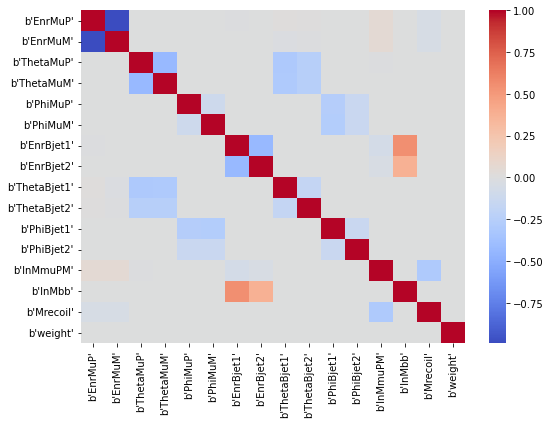

In [9]:
SigCorrMatrix = SigDf.corr()

# Create a correlation matrix plot
plt.figure(figsize=(8, 6))
sns.heatmap(SigCorrMatrix, annot=False, cmap='coolwarm')
#plt.title('Correlation Matrix Background', fontsize=25)
plt.tight_layout()
plt.savefig('SigCorr.pdf')
plt.show()

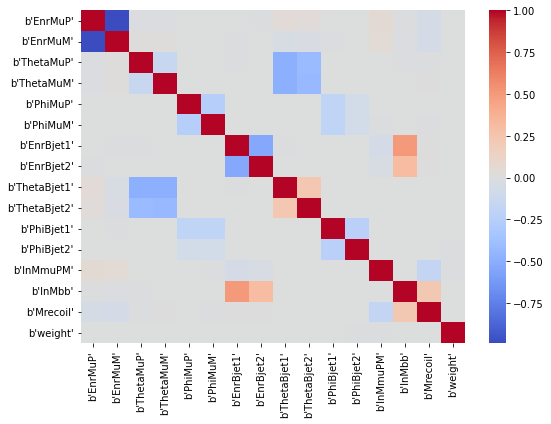

In [10]:
BackCorrMatrix = BackDf.corr()

# Create a correlation matrix plot
plt.figure(figsize=(8, 6))
sns.heatmap(BackCorrMatrix, annot=False, cmap='coolwarm')
#plt.title('Correlation Matrix Background', fontsize=25)
plt.tight_layout()
plt.savefig('BackCorr.pdf')
plt.show()

In [12]:
# Step 1: Convert byte string column names to regular strings
BackDf.columns = [col.decode('utf-8') if isinstance(col, bytes) else col for col in BackDf.columns]

BackCorrMatrix = BackDf.corr()

# Step 3: Get the correlation of all features with the target 'Mrecoil'
target = 'Mrecoil'
correlation_with_target_bkg = BackCorrMatrix[target].drop(target)  # Exclude 'Mrecoil' itself

# Step 4: Rank features based on absolute correlation with the target
ranked_features_bkg = correlation_with_target_bkg.abs().sort_values(ascending=False)

# Print the ranked features
print("Ranked features based on correlation with 'Mrecoil' (bkg):")
print(ranked_features_bkg)

Ranked features based on correlation with 'Mrecoil' (bkg):
InMbb         0.226924
InMmuPM       0.169639
EnrMuM        0.057819
EnrMuP        0.054349
EnrBjet1      0.011607
ThetaMuM      0.007300
EnrBjet2      0.005766
PhiMuM        0.005131
ThetaMuP      0.004350
PhiMuP        0.003169
ThetaBjet2    0.001508
ThetaBjet1    0.001418
PhiBjet1      0.000827
weight        0.000373
PhiBjet2      0.000207
Name: Mrecoil, dtype: float64


In [13]:
# Step 1: Convert byte string column names to regular strings
SigDf.columns = [col.decode('utf-8') if isinstance(col, bytes) else col for col in SigDf.columns]

SigCorrMatrix = SigDf.corr()

# Step 3: Get the correlation of all features with the target 'Mrecoil'
target = 'Mrecoil'
correlation_with_target = SigCorrMatrix[target].drop(target)  # Exclude 'Mrecoil' itself

# Step 4: Rank features based on absolute correlation with the target
ranked_features = correlation_with_target.abs().sort_values(ascending=False)

# Print the ranked features
print("Ranked features based on correlation with 'Mrecoil':")
print(ranked_features)

Ranked features based on correlation with 'Mrecoil':
InMmuPM       0.293578
EnrMuP        0.045988
EnrMuM        0.044984
PhiBjet1      0.003652
InMbb         0.002520
weight        0.002479
EnrBjet1      0.001755
PhiMuM        0.001544
PhiBjet2      0.001271
ThetaMuM      0.001160
PhiMuP        0.000991
ThetaBjet2    0.000801
ThetaMuP      0.000457
EnrBjet2      0.000382
ThetaBjet1    0.000272
Name: Mrecoil, dtype: float64


In [14]:
#Drop highly correlated features
BackDf = BackDf.drop(columns=['ThetaBjet1','EnrBjet2','ThetaMuP','ThetaBjet2','PhiMuP'])
SigDf = SigDf.drop(columns=['ThetaBjet1','EnrBjet2','ThetaMuP','ThetaBjet2','PhiMuP'])

In [15]:
SigDf['label'] = 1
SigDf.head()

BackDf['label'] = 0
BackDf.head()

print(SigDf.shape, BackDf.shape)
BackDf.head()

(330109, 12) (168036, 12)


,EnrMuP,EnrMuM,ThetaMuM,PhiMuM,EnrBjet1,PhiBjet1,PhiBjet2,InMmuPM,InMbb,Mrecoil,weight,label
0,102.282689,19.644855,1.964995,-1.924757,90.514165,-2.116252,0.884097,83.127532,76.159782,91.904379,0.020541,0
1,51.631872,70.609372,0.223100,-0.083172,89.837866,-1.338831,-2.841567,91.851372,88.646965,99.075996,0.020541,0
2,65.617711,59.174904,2.235892,1.104504,78.877243,-2.549187,1.862599,91.533477,75.105085,92.098152,0.020541,0
3,55.363214,67.694456,0.943884,0.006017,42.334872,-1.822894,-2.278329,91.646258,39.978035,96.799801,0.020541,0
4,81.765589,44.628754,1.964759,2.998727,36.802393,-2.509865,0.507232,94.111121,73.353696,90.331231,0.020541,0


In [16]:
SigDfNew = SigDf.sample(frac=1, random_state=99)

SplusB = shuffle(pd.concat([SigDfNew, BackDf]))
#SplusB.head()

SplusB[SplusB['label']==0].shape, SplusB[SplusB['label']==1].shape

((168036, 12), (330109, 12))

In [17]:
dataset = SplusB.values
#print(dataset[:,0:15)
#print(dataset[:,16])

X = dataset[:,0:10].astype(float)
Y = dataset[:,11]
X_train, X_test, Y_train, Y_test = train_test_split(X, Y, test_size=0.3, random_state=1)

In [18]:
initializer = tf.keras.initializers.RandomNormal()
initializer1 = tf.keras.initializers.HeUniform()
initializer2 = tf.keras.initializers.GlorotNormal()
initializer3 = tf.keras.initializers.GlorotUniform()
initializer4 = tf.keras.initializers.HeNormal()
initializer5 = tf.keras.initializers.RandomUniform()

In [ ]:
#from tensorflow.keras.layers import Dense, Dropout, BatchNormalization
#from tensorflow.keras.optimizers import Adam, Adagrad
#from tensorflow.keras.layers import Input
#
#model = Sequential()
#
#model.add(Input(shape=(15,)))
#model.add(Dense(128, activation='relu', kernel_initializer=initializer1))
#model.add(BatchNormalization())
##model.add(Dropout(0.05))
#
#model.add(Dense(64, kernel_initializer=initializer1, activation='relu'))
#model.add(BatchNormalization())
##model.add(Dropout(0.05))
#
#model.add(Dense(32, kernel_initializer=initializer1, activation='relu'))
#model.add(BatchNormalization())
##model.add(Dropout(0.05))
#
#model.add(Dense(16, kernel_initializer=initializer1, activation='relu'))
#model.add(BatchNormalization())
#
#model.add(Dense(1, kernel_initializer=initializer3, activation='sigmoid'))
#
#model.compile(optimizer=Adam(learning_rate=0.0001), loss='binary_crossentropy', metrics=['accuracy'])
#
#model.summary()
#history = model.fit(X_train,Y_train,epochs=180,batch_size=100,verbose=1,validation_split=0.3,shuffle=True)

In [19]:
from tensorflow.keras.layers import Dense, Dropout, BatchNormalization
from tensorflow.keras.optimizers import Adam, Adagrad
from tensorflow.keras.layers import Input

model = Sequential()

model.add(Input(shape=(10,)))
model.add(Dense(128, activation='relu', kernel_initializer=initializer1))
model.add(BatchNormalization())
model.add(Dense(30, kernel_initializer=initializer1, activation='relu'))
model.add(BatchNormalization())
model.add(Dense(30, kernel_initializer=initializer1, activation='relu'))
model.add(BatchNormalization())
model.add(Dense(30, kernel_initializer=initializer1, activation='relu'))
model.add(BatchNormalization())
model.add(Dense(30, kernel_initializer=initializer1, activation='relu'))
model.add(BatchNormalization())
model.add(Dense(30, kernel_initializer=initializer1, activation='relu'))
model.add(BatchNormalization())
model.add(Dense(30, kernel_initializer=initializer1, activation='relu'))
model.add(BatchNormalization())
model.add(Dense(30, kernel_initializer=initializer1, activation='relu'))
model.add(BatchNormalization())
model.add(Dense(30, kernel_initializer=initializer1, activation='relu'))
model.add(BatchNormalization())
model.add(Dense(30, kernel_initializer=initializer1, activation='relu'))
model.add(BatchNormalization())
model.add(Dense(30, kernel_initializer=initializer1, activation='relu'))
model.add(BatchNormalization())
model.add(Dense(30, kernel_initializer=initializer1, activation='relu'))
model.add(BatchNormalization())
model.add(Dense(30, kernel_initializer=initializer1, activation='relu'))
model.add(BatchNormalization())
model.add(Dense(30, kernel_initializer=initializer1, activation='relu'))
model.add(BatchNormalization())
model.add(Dense(30, kernel_initializer=initializer1, activation='relu'))
model.add(BatchNormalization())

model.add(Dense(1, kernel_initializer=initializer3, activation='sigmoid'))

model.compile(optimizer=Adam(learning_rate=0.0001), loss='binary_crossentropy', metrics=['accuracy'])

model.summary()
history = model.fit(X_train,Y_train,epochs=130,batch_size=100,verbose=1,validation_split=0.3,shuffle=True)

Model: "sequential"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 dense (Dense)               (None, 128)               1408      
                                                                 
 batch_normalization (BatchN  (None, 128)              512       
 ormalization)                                                   
                                                                 
 dense_1 (Dense)             (None, 30)                3870      
                                                                 
 batch_normalization_1 (Batc  (None, 30)               120       
 hNormalization)                                                 
                                                                 
 dense_2 (Dense)             (None, 30)                930       
                                                                 
 batch_normalization_2 (Batc  (None, 30)               1

2024-09-09 08:51:04.835786: W tensorflow/stream_executor/platform/default/dso_loader.cc:64] Could not load dynamic library 'libcuda.so.1'; dlerror: libcuda.so.1: cannot open shared object file: No such file or directory; LD_LIBRARY_PATH: /home/anza-tshilidzi/root/root-6.26.06-install/lib::/home/anza-tshilidzi/Downloads/LHAPDF/lib:/home/anza-tshilidzi/Downloads/LHAPDF/lib
2024-09-09 08:51:04.835819: W tensorflow/stream_executor/cuda/cuda_driver.cc:269] failed call to cuInit: UNKNOWN ERROR (303)
2024-09-09 08:51:04.835832: I tensorflow/stream_executor/cuda/cuda_diagnostics.cc:156] kernel driver does not appear to be running on this host (anzatshilidzi): /proc/driver/nvidia/version does not exist
2024-09-09 08:51:04.836027: I tensorflow/core/platform/cpu_feature_guard.cc:193] This TensorFlow binary is optimized with oneAPI Deep Neural Network Library (oneDNN) to use the following CPU instructions in performance-critical operations:  AVX2 AVX512F AVX512_VNNI FMA
To enable them in other ope

Epoch 1/130
2441/2441 [==============================] - 9s 3ms/step - loss: 0.6620 - accuracy: 0.6281 - val_loss: 0.5918 - val_accuracy: 0.6993
Epoch 2/130
2441/2441 [==============================] - 7s 3ms/step - loss: 0.5332 - accuracy: 0.7460 - val_loss: 0.4323 - val_accuracy: 0.8197
Epoch 3/130
2441/2441 [==============================] - 7s 3ms/step - loss: 0.4202 - accuracy: 0.8263 - val_loss: 0.3650 - val_accuracy: 0.8570
Epoch 4/130
2441/2441 [==============================] - 7s 3ms/step - loss: 0.3737 - accuracy: 0.8514 - val_loss: 0.3433 - val_accuracy: 0.8674
Epoch 5/130
2441/2441 [==============================] - 7s 3ms/step - loss: 0.3529 - accuracy: 0.8605 - val_loss: 0.3279 - val_accuracy: 0.8724
Epoch 6/130
2441/2441 [==============================] - 7s 3ms/step - loss: 0.3392 - accuracy: 0.8655 - val_loss: 0.3175 - val_accuracy: 0.8752
Epoch 7/130
2441/2441 [==============================] - 7s 3ms/step - loss: 0.3300 - accuracy: 0.8689 - val_loss: 0.3152 - val_ac

2441/2441 [==============================] - 7s 3ms/step - loss: 0.2897 - accuracy: 0.8846 - val_loss: 0.2894 - val_accuracy: 0.8841
Epoch 58/130
2441/2441 [==============================] - 7s 3ms/step - loss: 0.2891 - accuracy: 0.8849 - val_loss: 0.2901 - val_accuracy: 0.8850
Epoch 59/130
2441/2441 [==============================] - 7s 3ms/step - loss: 0.2895 - accuracy: 0.8846 - val_loss: 0.2876 - val_accuracy: 0.8850
Epoch 60/130
2441/2441 [==============================] - 7s 3ms/step - loss: 0.2892 - accuracy: 0.8850 - val_loss: 0.2891 - val_accuracy: 0.8848
Epoch 61/130
2441/2441 [==============================] - 7s 3ms/step - loss: 0.2890 - accuracy: 0.8850 - val_loss: 0.2872 - val_accuracy: 0.8853
Epoch 62/130
2441/2441 [==============================] - 7s 3ms/step - loss: 0.2886 - accuracy: 0.8849 - val_loss: 0.2869 - val_accuracy: 0.8854
Epoch 63/130
2441/2441 [==============================] - 7s 3ms/step - loss: 0.2886 - accuracy: 0.8851 - val_loss: 0.2901 - val_accuracy

2441/2441 [==============================] - 8s 3ms/step - loss: 0.2851 - accuracy: 0.8866 - val_loss: 0.2876 - val_accuracy: 0.8857
Epoch 114/130
2441/2441 [==============================] - 7s 3ms/step - loss: 0.2854 - accuracy: 0.8858 - val_loss: 0.2873 - val_accuracy: 0.8857
Epoch 115/130
2441/2441 [==============================] - 8s 3ms/step - loss: 0.2861 - accuracy: 0.8860 - val_loss: 0.2884 - val_accuracy: 0.8850
Epoch 116/130
2441/2441 [==============================] - 7s 3ms/step - loss: 0.2858 - accuracy: 0.8860 - val_loss: 0.2874 - val_accuracy: 0.8859
Epoch 117/130
2441/2441 [==============================] - 8s 3ms/step - loss: 0.2856 - accuracy: 0.8859 - val_loss: 0.2891 - val_accuracy: 0.8852
Epoch 118/130
2441/2441 [==============================] - 7s 3ms/step - loss: 0.2850 - accuracy: 0.8868 - val_loss: 0.2924 - val_accuracy: 0.8845
Epoch 119/130
2441/2441 [==============================] - 7s 3ms/step - loss: 0.2855 - accuracy: 0.8858 - val_loss: 0.2885 - val_ac

In [ ]:
# Use KernelExplainer for the trained model
#explainer = shap.KernelExplainer(model.predict, X_train)

# Compute SHAP values
#shap_values = explainer.shap_values(X_test)

# Summary plot for feature importance
#shap.summary_plot(shap_values, X_test, feature_names=dataset['feature_names'])

# Optional: Feature importance as a bar plot
#shap.summary_plot(shap_values, X_test, plot_type="bar", feature_names=dataset['feature_names'])

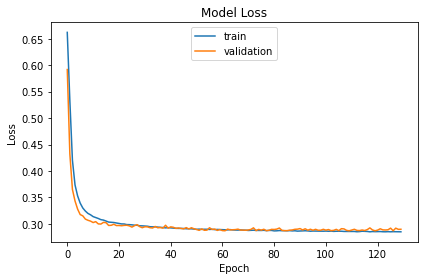

In [20]:
plt.plot(history.history['loss'],"-")
plt.plot(history.history['val_loss'])
plt.title('Model Loss')
plt.ylabel('Loss')
plt.xlabel('Epoch')
plt.legend(['train', 'validation'], loc='upper center')
plt.tight_layout()
plt.savefig('DNN_Loss_function.pdf')
plt.show()

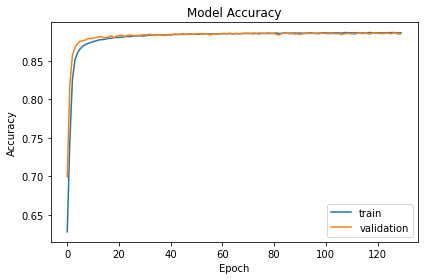

In [21]:
plt.grid(False)
plt.plot(history.history['accuracy'],"-")
plt.plot(history.history['val_accuracy'])
plt.title('Model Accuracy')
plt.ylabel('Accuracy')
plt.xlabel('Epoch')
plt.legend([r'\bf{train}', r'\bf{validation}'],loc='best')
plt.legend(['train', 'validation'], loc='best')
plt.tight_layout()
plt.savefig('DNN_Model_Accuracy.pdf')
plt.show()

In [22]:
pred_train= model.predict(X_train)
pred_train= list(chain.from_iterable(pred_train)) 

scores= model.evaluate(X_train, Y_train, verbose=0)
print('Accuracy on training data: {}% \n Error on training data: {}'.format(scores[1], 1 - scores[1]))   
 
pred_test= model.predict(X_test)
pred_test= list(chain.from_iterable(pred_test)) 

scoresS2 = model.evaluate(X_test, Y_test, verbose=0)
print('Accuracy on test data: {}% \n Error on test data: {}'.format(scoresS2[1], 1 - scoresS2[1]))  

10897/10897 [==============================] - 9s 775us/step
Accuracy on training data: 0.8866077065467834% 
 Error on training data: 0.11339229345321655
4671/4671 [==============================] - 4s 755us/step
Accuracy on test data: 0.8855758905410767% 
 Error on test data: 0.11442410945892334


In [23]:
# Function to retrieve model results
def function1(label, probs):
    sig = []
    backG = []
    for i in range(len(probs)):
        if(label[i] == 1):
            sig.append(probs[i])
            
        elif(label[i] == 0):
            backG.append(probs[i])
            
    return sig,backG

In [24]:
sig_training,back_training = function1(Y_train, pred_train)
sig_testing,back_testing = function1(Y_test, pred_test)

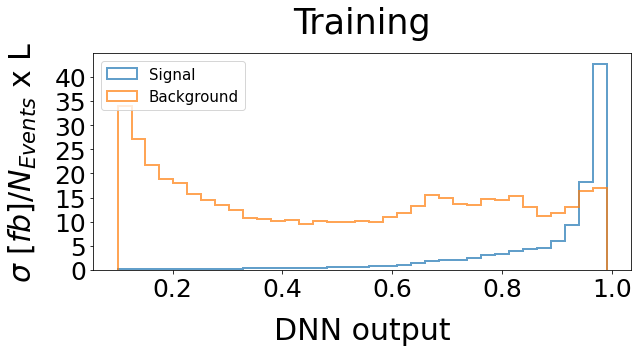

In [25]:
rng = np.random.default_rng(seed=123)

wei20 = 10*500*0.1*(np.ones_like(sig_training)/1000000)# / float(len(sig_training))) #(0.01*0.1) *  #(np.ones_like(sig_training))*0.010*0.1*500000 
wei21 = 16.8*500*(np.ones_like(back_training)/1000000)# / float(len(back_training))) #(0.016) * # np.ones_like(back_training)*0.016*500000

fig, ax = plt.subplots(figsize=(9,5))
ax.hist(sig_training, weights=wei20, bins=35, range=(0.1,.99), histtype='step', linewidth=2, alpha=0.7, label='Signal')
ax.hist(back_training, weights=wei21, bins=35, range=(0.1,.99), histtype='step', linewidth=2, alpha=0.7, label='Background')


# Add annotations
plt.ylabel('$\sigma$ [$fb$]/$N_{Events}$ x L', fontsize=30, labelpad=15)
plt.xlabel('DNN output', fontsize=30, labelpad=15)
plt.title('Training', fontsize=35, pad=20)
plt.xticks(fontsize=25)
plt.yticks(fontsize=25)
plt.legend(fontsize=15, loc='upper left')
plt.tight_layout()
# plt.savefig('train_rmass_cut.pdf')
plt.show()

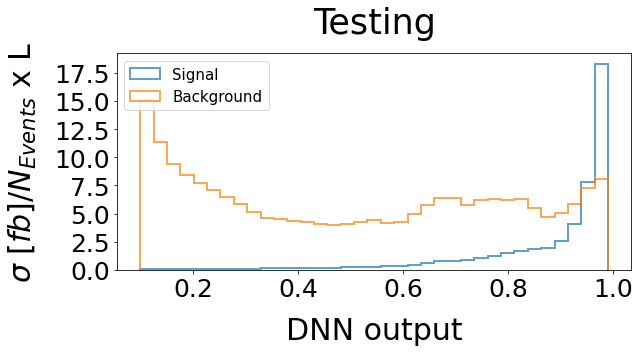

In [26]:
from matplotlib.lines import Line2D

rng = np.random.default_rng(seed=123)

wei20t = 10*500*0.1*(np.ones_like(sig_testing)/1000000)# / float(len(sig_testing)))#0.010*500000*0.1*(np.ones_like(sig_testing) / float(len(sig_testing)))
wei21t = 16.8*500*(np.ones_like(back_testing)/1000000) #/ float(len(back_testing)))#0.016*500000*(np.ones_like(back_testing) / float(len(back_testing)))

fig, ax = plt.subplots(figsize=(9,5))
ax.hist(sig_testing, weights=wei20t, bins=35, range=(0.1,.99), histtype='step', linewidth=2, alpha=0.7, label='Signal')
ax.hist(back_testing, weights=wei21t, bins=35, range=(0.1,.99), histtype='step', linewidth=2, alpha=0.7, label='Background')

# Add annotations
plt.ylabel('$\sigma$ [$fb$]/$N_{Events}$ x L', fontsize=30, labelpad=15)
plt.xlabel('DNN output', fontsize=30, labelpad=15)
plt.title('Testing', fontsize=35, pad=20)
plt.xticks(fontsize=25)
plt.yticks(fontsize=25)
plt.legend(fontsize=15, loc='upper left')
plt.tight_layout()
plt.savefig('test_rmass_cut.pdf')
plt.show()

In [26]:
Sigtest_after_DNN = [value for value in sig_testing if 0.95 <= value <= 0.99]

In [27]:
Backtest_after_DNN = [value for value in back_testing if 0.01 <= value <= 0.95]

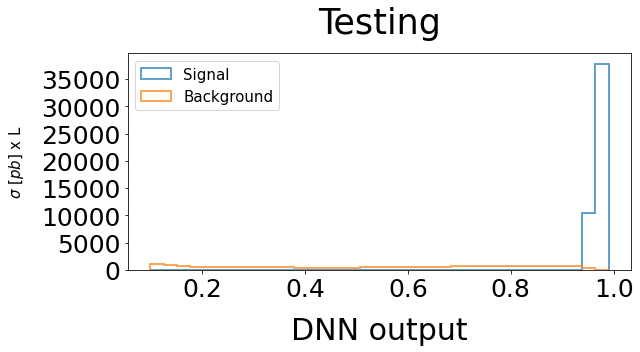

In [28]:
fig, ax = plt.subplots(figsize=(9,5))
ax.hist(Sigtest_after_DNN, bins=35, range=(0.1,.99), histtype='step', linewidth=2, alpha=0.7, label='Signal')
ax.hist(Backtest_after_DNN, bins=35, range=(0.1,.99), histtype='step', linewidth=2, alpha=0.7, label='Background')

# Add annotations
plt.ylabel('$\sigma$ [$pb$] x L', fontsize=15, labelpad=15)  # Adjust fontsize and padding
plt.xlabel('DNN output', fontsize=30, labelpad=15)
plt.title('Testing', fontsize=35, pad=20)
plt.xticks(fontsize=25)
plt.yticks(fontsize=25)
plt.legend(fontsize=15, loc='upper left')
plt.tight_layout()
#plt.savefig('test_rmass_cut.pdf')
plt.show()

In [31]:
# Get predicted probabilities (for the positive class)
y_proba = model.predict(X_test).ravel()  # Flatten the output

4671/4671 [==============================] - 4s 779us/step


In [27]:
fpr_Test, tpr_Test, threshold = roc_curve(Y_test, pred_test)
fpr_Train, tpr_Train, threshold = roc_curve(Y_train, pred_train)

In [34]:
# Calculate Youden's J statistic to find the optimal threshold
j_scores = tpr_Test - fpr_Test
optimal_idx = np.argmax(j_scores)
optimal_threshold = threshold[optimal_idx]

print(f"Optimal Threshold: {optimal_threshold}")

Optimal Threshold: 0.9640125036239624


In [35]:
# Apply the optimal threshold to classify
y_pred = (y_proba >= optimal_threshold).astype(int)

# Print the predictions
print("Predictions after applying the optimal threshold:", y_pred)

Predictions after applying the optimal threshold: [0 0 0 ... 0 1 0]


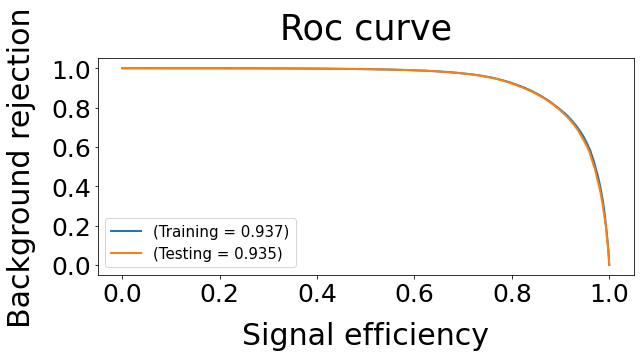

In [30]:
from matplotlib.lines import Line2D

auc_keras_Test = auc(fpr_Test, tpr_Test)
auc_keras_Train = auc(fpr_Train, tpr_Train)

fig, ax = plt.subplots(figsize=(9,5))

ax.plot(1-fpr_Train, tpr_Train,linewidth=2, label='(Training = {:.3f})'.format(auc(fpr_Train, tpr_Train)))
ax.plot(1-fpr_Test, tpr_Test,linewidth=2, label='(Testing = {:.3f})'.format(auc(fpr_Test, tpr_Test)))


# Add annotations
plt.ylabel('Background rejection', fontsize=30, labelpad=15)
plt.xlabel('Signal efficiency', fontsize=30, labelpad=15)
plt.title('Roc curve', fontsize=35, pad=20)
plt.xticks(fontsize=25)
plt.yticks(fontsize=25)
plt.legend(fontsize=15)
plt.tight_layout()
plt.savefig('roc_rmass_cut.pdf')
plt.show()

In [31]:
def function(pred_train, feature, start, end):
    final = []
    print(len(pred_train))
    count = 0
    for i in range(len(pred_train)):
        if(pred_train[i]>= start and pred_train[i] <= end ):
            final.append(feature[i])
            count += 1
    print(count/len(pred_train))
    return final

In [32]:
X_train.shape

(348701, 15)

In [ ]:
Re_mass1 = function(pred_train, X_train[:,14], 0.96, 0.99)#14

In [ ]:
len(Re_massBack)
#Re_mass1

In [36]:
def function3(pred_train, feature, labels, start, end, target_label):
    final = []
    for i in range(len(pred_train)):
        if(start <= pred_train[i] <= end and labels[i] == target_label):
            final.append(feature[i])
    return final

In [43]:
Re_massBack = function3(pred_train, X_train[:,9], Y_train, 0.96, 0.99, 0)#14
Re_massSig = function3(pred_train, X_train[:,9], Y_train, 0.96, 0.99, 1)#14

In [46]:
count_back =  sum(93.5 <= x <= 97.5 for x in Re_massBack)
count_sig = sum(93.5 <= x <= 97.5 for x in Re_massSig)

L = 5*10**5
N = 10**6
SigWeight = 0.01*0.1
BackWeight = 0.0168
DelSys = 0.02

B = count_back*BackWeight*L/N
S = count_sig*SigWeight*L/N
DelSys = 0.02

print(count_back)
print(count_sig) 

B_Sys = DelSys*B
signific = S/math.sqrt(B+B_Sys**2)
print('Significance after DNN cuts is =', signific)
#S

2395
93938
Significance after DNN cuts is = 10.429859981145949


In [ ]:
Sig_Back = pd.DataFrame({
    0: Re_mass1,
    1: Re_massBack
})
Sig_Back

In [ ]:
Sig_Back.to_csv('Recoil_SB.tsv', sep='\t', index=False)

In [ ]:
np.shape(Re_massBack)

In [ ]:
SB_combination = 11*500Re_mass1 + Re_massBack
SB_combination

In [ ]:
wei221 = 11*500*0.1* np.ones_like(SB_combination) / float(len(SB_combination))
wei222 = 21*500* np.ones_like(Re_massBack) / float(len(Re_massBack))

# Check the shapes to ensure they match
print(f"Shape of wei221: {wei221.shape}")  # Should be (25368,)
print(f"Shape of wei222: {wei222.shape}")  # Should be (11753,)


In [ ]:
np.shape(wei222)

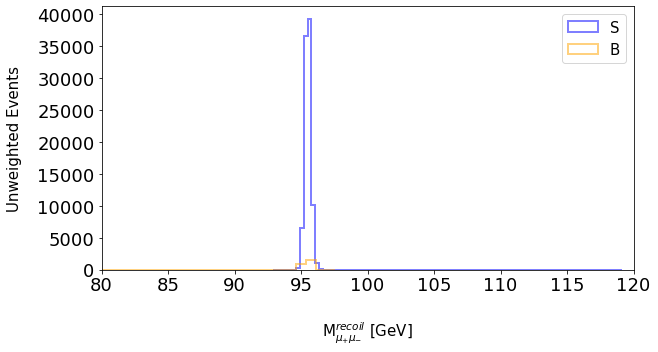

In [45]:
from matplotlib.lines import Line2D

rng = np.random.default_rng(seed=123)

#wei221 = np.ones_like(Re_massSig)*0.01*0.1 #+  np.ones_like(Re_massBack)*0.016 
#wei222 = np.ones_like(Re_massBack)*0.016
wei221 = 10*500*0.1*(np.ones_like(Re_massSig)/1000000) #* 0.4
wei222 = 16.8*500*(np.ones_like(Re_massBack) /1000000) #* 0.4


# Create figure with 'step' type of histogram to improve plot readability
fig, ax = plt.subplots(figsize=(9,5))
#ax.hist(Re_mass1, weights=wei221, bins=90, histtype='step', linewidth=2, label='S')
#ax.hist(Re_massBack, weights=wei222, bins=90, histtype='step', linewidth=2, label='B')

ax.hist(Re_massSig, bins=90, histtype='step', linewidth=2, label='S',color='blue', alpha=0.5)
ax.hist(Re_massBack, bins=90, histtype='step', linewidth=2, label='B',color='orange', alpha=0.5)

# Remove spines
#ax.spines['top'].set_visible(False)
#ax.spines['right'].set_visible(False)

plt.ylabel('Unweighted Events', fontsize=15, labelpad=15)  # Adjust fontsize and padding
plt.xlabel('M$^{recoil}_{\mu_{+} \mu_{-}}$ [GeV]', fontsize=15, labelpad=25)  # Adjust fontsize and padding

# Add title (uncomment if needed)
# plt.title('Class 1', fontsize=30, pad=20)

# Set tick parameters
plt.xticks(fontsize=18)
plt.yticks(fontsize=18)

plt.legend(fontsize=15, loc='upper right')

# Adjust layout and limits
plt.tight_layout()
plt.xlim(80, 120)
plt.savefig('Re mass.pdf')
plt.show()

In [ ]:
import numpy as np
import matplotlib.pyplot as plt

# Assuming Re_mass1.shape == (25368,)
# Assuming Re_massBack.shape == (11753,)

# Calculate the weights for the histograms
wei221 = 11*500*0.1*(np.ones_like(Re_mass1) / float(len(Re_mass1))) #500000 * 0.1 * #* 0.4
wei222 = 21*500*(np.ones_like(Re_massBack) / float(len(Re_massBack))) #500000 * #* 0.4
wei223 = 11*500*0.1*(np.ones_like(Re_massSig) / float(len(Re_massSig)))


# Combine the data and weights
combined_data = np.concatenate((Re_mass1, Re_massBack))
combined_weights = np.concatenate((wei221, wei222))

# Create a figure with 'step' type of histogram
fig, ax = plt.subplots(figsize=(9, 5))

# Plot the grand histogram
ax.hist(combined_data, weights=combined_weights, bins=90, histtype='step', linewidth=2, label='Combined')
#ax.hist(combined_data, bins=90, histtype='step', linewidth=2, label='S+B')


# Set labels for the x and y axes
plt.ylabel('Normalized to Unity', fontsize=15, labelpad=15)
plt.xlabel('M$^{recoil}_{\mu_{+} \mu_{-}}$ [GeV]', fontsize=15, labelpad=25)

# Set tick parameters for readability
plt.xticks(fontsize=18)
plt.yticks(fontsize=18)

# Add a legend
plt.legend(fontsize=15, loc='upper right')

# Adjust the layout and set the x-axis limits
plt.tight_layout()
plt.xlim(80, 120)

# Save the figure as a PDF
plt.savefig('Re_mass_grand.pdf')

# Display the plot
plt.show()


In [ ]:
combined_data.shape

In [ ]:
from matplotlib.lines import Line2D

rng = np.random.default_rng(seed=123)

#wei221 = 0.010*500000*0.1*(np.ones_like(Re_mass1) / float(len(Re_mass1)))
#wei222 = 0.016*500000*(np.ones_like(Re_massBack) / float(len(Re_massBack)))


# Create figure with 'step' type of histogram to improve plot readability
fig, ax = plt.subplots(figsize=(9,5))
ax.hist(combined_data, weights=combined_weights, bins=120, histtype='step', linewidth=2, label='S+B')
ax.hist(Re_massBack, weights=wei222, bins=120, histtype='step', linewidth=2, label='B')

# Remove spines
#ax.spines['top'].set_visible(False)
#ax.spines['right'].set_visible(False)

plt.ylabel('$\sigma$ [$pb$] x L', fontsize=15, labelpad=15)  # Adjust fontsize and padding
plt.xlabel('M$^{recoil}_{\mu_{+} \mu_{-}}$ [GeV]', fontsize=15, labelpad=25)  # Adjust fontsize and padding

# Add title (uncomment if needed)
# plt.title('Class 1', fontsize=30, pad=20)

# Set tick parameters
plt.xticks(fontsize=18)
plt.yticks(fontsize=18)

plt.legend(fontsize=15, loc='upper right')

# Adjust layout and limits
plt.tight_layout()
plt.xlim(80, 115)
plt.savefig('Re_mass_FINAL_After_DNN_Cut.pdf')
plt.show()

In [ ]:
Remass_min = 80
Remass_max = 120
num_bins = 40

#weights
wei221 = 11*500*0.1*(np.ones_like(Re_mass1) / float(len(Re_mass1))) #500000 * 0.1 * #* 0.4
wei222 = 21*500*(np.ones_like(Re_massBack) / float(len(Re_massBack)))

#Create histograms with the specified bin edges
bins = np.linspace(Remass_min, Remass_max, num_bins+1)
n1, _ = np.histogram(Re_mass1, bins=bins)
n2, _ = np.histogram(Re_massBack, bins=bins)

SB_data = np.concatenate((Re_mass1, Re_massBack))

#Prepare the data to save
bin_centres = (bins[:-1] + bins[1:]) / 2
hist_data = np.c_[bin_centres, n1, n2]


#Save the data to a text file
np.savetxt('RecoilMass.txt', hist_data, header='Recoil_mass No_of_Events_S No_of_Events_B', fmt='%f %d %d')

#Optionally you can plot the histograms to visualise them
plt.hist(SB_data, weights=combined_weights,bins=bins, edgecolor='black', alpha=0.7, label='S+B')#,color='blue')
plt.hist(Re_massBack, weights=wei222,bins=bins, edgecolor='black', alpha=0.7, label='B')#,color='orange')

plt.ylabel('Events', fontsize=15, labelpad=15)  # Adjust fontsize and padding
plt.xlabel('M$^{recoil}_{\mu_{+} \mu_{-}}$ [GeV]', fontsize=15, labelpad=25)  # Adjust fontsize and padding
plt.title('Recoil Mass')
plt.legend()
plt.savefig('Re_mass_FINAL_After_DNN_Cut.pdf')
plt.show()